<a href="https://colab.research.google.com/github/cedamusk/AI-N-ML/blob/main/Regularized_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)

In [3]:
X, y=make_classification(
    n_samples=1000,
    n_features=20,
    n_classes=2,
    n_clusters_per_class=2,
    n_redundant=5,
    n_informative=15,
    random_state=42
)

In [4]:
X_train, X_test, y_train, y_test=train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
model=LogisticRegression(
    C=1.0,
    penalty='l2',
    random_state=42
)

model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [6]:
y_pred=model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)[:, 1]

In [7]:
conf_matrix=confusion_matrix(y_test, y_pred)

In [8]:
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
logloss=log_loss(y_test, y_pred_proba)

In [9]:
fpr, tpr, _=roc_curve(y_test, y_pred_proba)
roc_auc=auc(fpr, tpr)

In [12]:
plt.figure(figsize=(20, 6))


<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

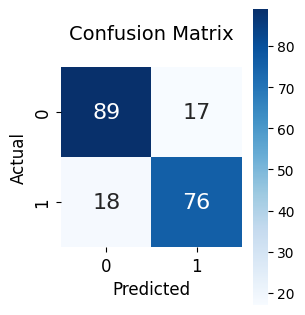

In [14]:
plt.subplot(1,2,1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            square=True,
            cbar_kws={"shrink": .8},
            annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=14, pad=20)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

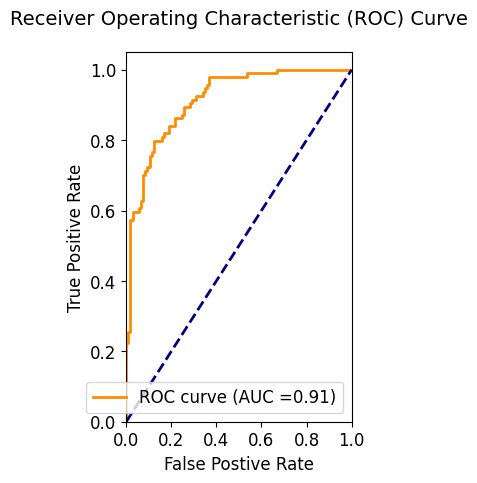

In [17]:
plt.subplot(1,2,2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC ={roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Postive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, pad=20)
plt.legend(loc="lower right", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


In [18]:
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {logloss:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")


Model Evaluation Metrics:
Accuracy: 0.8250
Precision: 0.8172
Recall: 0.8085
F1 Score: 0.8128
Log Loss: 0.3701
AUC-ROC: 0.9137


In [19]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>